In [225]:
import pandas as pd
import numpy as np
import datetime
import geopandas as gpd
import difflib
import country_converter as coco
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [226]:
dt =  datetime.datetime.today()-datetime.timedelta(days=1)

data_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+dt.strftime("%m-%d-%Y.csv")

df=pd.read_csv(data_link)
df.rename(columns = {'Country_Region':'iso_a3'}, inplace = True) 

In [227]:
g=df.groupby("iso_a3")

In [228]:
f=g['Confirmed'].sum()

In [229]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [230]:
standard_names = coco.convert(names=list(f.index), to='ISO3')

In [231]:
m=f.reset_index()
m["iso_a3"]=standard_names
m

,iso_a3,Confirmed
0,AFG,840
1,ALB,518
2,DZA,2268
3,AND,673
4,AGO,19
...,...,...
180,PSE,374
181,ESH,6
182,YEM,1
183,ZMB,48


In [232]:
world=world.merge(m, on='iso_a3')

In [233]:
world["cp"]=world["Confirmed"]/world["pop_est"]

In [254]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(.241, 1, N)
vals[:, 1] = np.linspace(.241, 0, N)
vals[:, 2] = np.linspace(.241, 0, N)
newcmp = ListedColormap(vals)

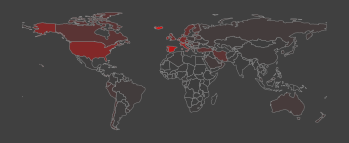

In [257]:
fig, ax = plt.subplots(facecolor='#404040')
minx, miny, maxx, maxy = world.total_bounds
pad=20
ax.set_xlim([minx-pad, maxx+pad])
ax.set_ylim([miny-pad, maxy+pad])
world.plot(column='cp',cmap=newcmp,ax=ax,linewidth=0.5, edgecolor='0.5')
ax.set_axis_off()
plt.axis('scaled')
plt.savefig('world.png',dpi=240,facecolor=fig.get_facecolor(), edgecolor='none')